# Credit Income Model Built using Simple and Multiple Linear Regression

# <u>Part 1: Simple Linear Regression<u>

In [206]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import t
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('CreditCard.csv')
df.head()

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


### 3. Describing the data:
#### Initial Observations:
The dataset contains numerical as well as categorical variables.
1. **Numeric**: age,income,share,expenditure,months,reports,majorcards,active.
2. **Categorical**: card,owner,selfemp,dependents,rownames.

In [5]:
df.describe()

,rownames,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,660.000000,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,380.906813,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,1.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.500000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,660.000000,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,989.500000,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,1319.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


#### Key Observations:
1. **Age**: Average age of individuals in the datatset is 33.2 years, with a minimum age of 0.17 years (likely an error or newborn entry) and a maximum age of 83.5 years
2. **Income**: Average monthly income is USD 3365 with a wide range from USD 210 to USD 13,500.
3. **Expenditure**: The average monthly expenditure is USD 185, but there is a high standard deviation which suggests significant spending variation.
4. **Credit history**: The number of major derogatory reports ranges from 0 to 14, with most individuals having 0 reports (indicating good credit history).
5. **Credit Cards**: Most individuals have one major credit card.
6. **Months at Current Address**: The average individual has lived at their address for 55 months (appx. 4.5 years), but some have stayed as long as 45 years.
7. **Active Credit Accounts**: Number of active credit accounts varies significantly, ranging from 0 to 46. The average person has ~7 active credit accounts, suggesting a mix of different credit lines (loans, credit cards, etc).

In [21]:
nrows, ncol = df.shape
print(f'The dataset contains {nrows} rows and {ncol} columns.')

The dataset contains 1319 rows and 13 columns.


### 4. The dataset contains 1319 rows and 13 columns.

### 5. Creating a data partition

### We need to split the dataset into 60% training data (used to train the regression model) and 40% validation data (used to evaluate the model)

We will use train_test_split from sk.learn model_selection which:
1. Randomly splits the data into training and test sets.
2. Uses a fixed random seed (last 3 digits of my BU ID in this case) to ensure reproducibility.
3. Ensures no overlap between training and test data.

In [28]:
seed_val = 272 #These are the last 3 digits of my BU ID
train_df, test_df = train_test_split(df, test_size=0.4, random_state=seed_val)
print(f"Training Set: {train_df.shape[0]} rows, Validation Set: {test_df.shape[0]} rows")

Training Set: 791 rows, Validation Set: 528 rows


### 6. Why do we partition the data?
1. **Avoids Overfitting**: If we train and evaluate on the same data, the model will memorize patters rather than learning to generalize. A separate validation set helps test how well the model performs on new data.
2. **Ensures Fair Performance Evaluation**: When we build a predictive model, we need to know hwo it performs in real-world scenarios. The validation set provides an honest estimate of how well our model will work on future data.

#### Predicting Income Using Dependents as a Variable

Rather than asking consumers for their income directly, we can use other observable variables to predict it. One such variable is dependents, which refers to the number of people financially dependent on an individual, such as a spouse or children.

- The assumption is that individuals with more dependents may have higher incomes to support their families.
- People with higher incomes may choose to have more dependents due to financial stability.
- While not a perfect predictor, it may have a correlation with income and help in estimating a consumer’s earning potential.

## <u>Drilling Down<u>

### 1. Creating a scatterplot that depicts dependents on the x-axis and income on the y-axis

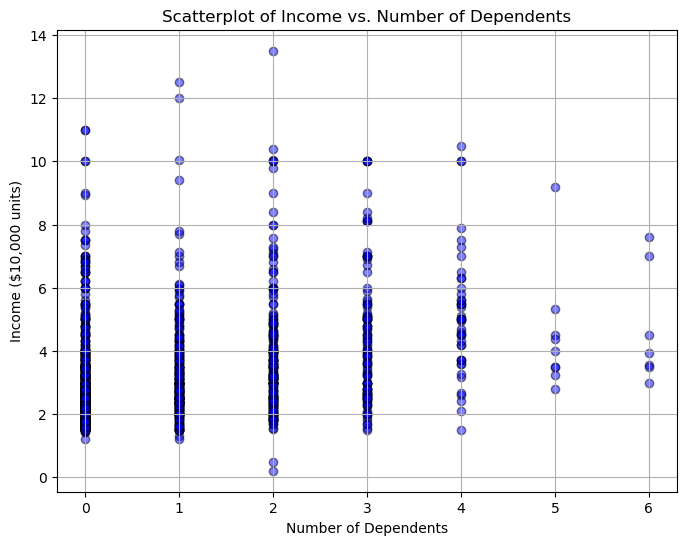

In [52]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['dependents'], df['income'], alpha=0.5, color='blue', edgecolors='k')

# Labels and title
plt.xlabel('Number of Dependents')
plt.ylabel('Income ($10,000 units)')
plt.title('Scatterplot of Income vs. Number of Dependents')
plt.grid(True)

plt.show()

### 2. Adding a best-fit line to the scatterplot only using the training data.

C:\Users\advpi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


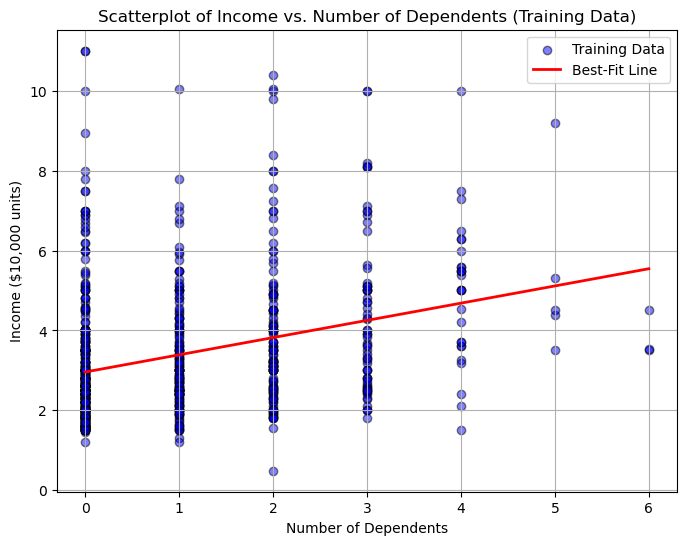

In [64]:
# Train the model using only the training set
X_train = train_df[['dependents']]  # Independent variable (reshaped for sklearn)
y_train = train_df['income']  # Dependent variable

# Fit Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions for the best-fit line
x_range = np.linspace(X_train.min(), X_train.max(), 100)  # Generate x values
y_pred = model.predict(x_range.reshape(-1, 1))  # Predict y values

# Create scatterplot with training data
plt.figure(figsize=(8, 6))
plt.scatter(train_df['dependents'], train_df['income'], alpha=0.5, color='blue', edgecolors='k', label="Training Data")

# Plot best-fit line
plt.plot(x_range, y_pred, color='red', linewidth=2, label="Best-Fit Line")

# Labels, title, and legend
plt.xlabel('Number of Dependents')
plt.ylabel('Income ($10,000 units)')
plt.title('Scatterplot of Income vs. Number of Dependents (Training Data)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

### 3. Key Observations:
1. **Weak Positive Relationship**: The best-fit line slopes upward, idicating a weak positive correlation between the number of dependents and income, this suggests as the number of dependents increase - income tends to increase slightly but the effect is not too strong.
2. **High variability in Income**: The scatterplot shows a wide variation in income at each dependent level. Many individuals with 0 or 1 dependent have both low and high incomes, making it difficult to establish a strong linear trend.
3. **Possible Explaination of Trend**: Higher-income individuals might be more likely to have dependents because they can support a larger household. However, people with lower incomes can als have multiple dependents, which expains the wide spread in income values.
4. **The Relationship Does Make Some Intuitive Sense**: While its reasonable to assume that people with more dependents may have higher incomes (due to career progression, financial stability etc), the weak correlation suggests that other factors (such as education, cost of living, job type etc) play a larger role in determining income. The large spread of income values at each dependent level suggests that dependents alone are not a strong predictor of income.

### 4. Using the training dataset to find correlation between income and dependents

In [72]:
corr = train_df['income'].corr(train_df['dependents'])
print(f"Correlation between Income and Dependents: {corr:.4f}")

Correlation between Income and Dependents: 0.3177


### Using the Pearson Correlation test to understand significance

In [78]:
# Compute Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(train_df['dependents'], train_df['income'])

# Display results
print(f"Pearson Correlation: {corr_coeff:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation: 0.3177
P-value: 0.0000


### Answer:
1. Correlation between Income and Dependents: 0.3177.
2. Correlation of 0.3177 falls into the weak-to-moderate range and suggests a weak to moderate positive relationship between income and dependents.
3. Since the p-value < 0.05, the correlation is statistically significant and is unlikely due to random chance.

### 5. Creating a Simple Linear Regression Model with income as the output variable and dependents as the input variable

In [90]:
# Define independent (X) and dependent (y) variables
X_train = train_df[['dependents']]  # Independent variable
y_train = train_df['income']  # Dependent variable

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Fit the Simple Linear Regression model
model = sm.OLS(y_train, X_train).fit()

# Display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     88.58
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           5.21e-20
Time:                        11:51:38   Log-Likelihood:                -1482.6
No. Observations:                 791   AIC:                             2969.
Df Residuals:                     789   BIC:                             2979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9601      0.072     41.158      0.0

### Interpretation:
**Equation**: Income = 2.9601 + 0.4308 x Dependents
1. **Intercept** (2.9601) represents the predicted income (in USD 10,000 units) for someone with 0 dependents. that translates to USD 29,601 per year.
2. **Coefficient for dependents** (0.4308) means that for each additional dependent, income increases by appx. USD 4308 per year.
3. **R-squared** is 10.01% which means that the model explains only 10.01% of the variation in income using dependents alone, which is very low.
4. The **F-statistic p-value** is extremely low, meaning the relationship is statistically significant.
5. The **T-statistic** for dependents showcases that the coefficent is statistically significant, meaing income does change with dependents but it only explains a small part of the variation.

### 6. Minimum and Maximum residual values in the model:

In [98]:
# Calculate residuals (actual - predicted values)
residuals = model.resid

# Find the minimum (most negative) and maximum (most positive) residual values
min_residual = residuals.min()
max_residual = residuals.max()

print(f"Minimum Residual: {min_residual:.4f}")
print(f"Maximum Residual: {max_residual:.4f}")

Minimum Residual: -3.3316
Maximum Residual: 8.0399


### Interpretations:
1. **Minimum Residual (-3.3316):**
- The most negative residual means that for one observation, the model overestimated income by USD 33,316.
- This suggests that the moel expected a much higher income than reality for at least one individual.

2. **Maximum Residual (8.0399):**
- The most positive residual means that for another oservation, the model underestimated income by USD 80,399.
- This suggests that the model expected a much lower income than reality for at least one individual.

The large spread of residuals suggests that dependents alone do not predict income well. The model struggles to make accurate predictions, likely because other key factors like job type, education, and experience are missing.

### 7. Highest Residual Observation 

In [110]:
# Find the index of the observation with the highest residual value
max_residual_index = residuals.idxmax()

# Get the actual income and predicted income for that observation
actual_income = train_df.loc[max_residual_index, 'income']
predicted_income = model.predict(X_train.loc[max_residual_index].values.reshape(1, -1))[0]

# Calculate the residual manually
calculated_residual = actual_income - predicted_income

# Display results
print(f"Observation Index: {max_residual_index}")
print(f"Actual Income: {actual_income:.4f} ($10,000 units → ${actual_income * 10,000})")
print(f"Predicted Income: {predicted_income:.4f} ($10,000 units → ${predicted_income * 10,000})")
print(f"Calculated Residual: {calculated_residual:.4f} ($10,000 units → ${calculated_residual * 10,000})")

Observation Index: 1239
Actual Income: 11.0000 ($10,000 units → $(110.0, 0))
Predicted Income: 2.9601 ($10,000 units → $(29.600587204891333, 0))
Calculated Residual: 8.0399 ($10,000 units → $(80.39941279510867, 0))


- Individual at index 1239 had an actual income of USD 110,000
- The regression model predicted their income to be only USD 29,601
- This resulted in a residual of + USD 80,399, meaning the model underestimated their income significantly

The residual is calculated using this formula: Residual = Actual Income - Predicted Income which is
110,000 - 29, 601 = 80,399

### 8. Lowest Residual Observation

In [123]:
# Find the index of the observation with the lowest residual value
min_residual_index = residuals.idxmin()

# Get the actual income and predicted income for that observation
actual_income = train_df.loc[min_residual_index, 'income']
predicted_income = model.predict(X_train.loc[min_residual_index].values.reshape(1, -1))[0]

# Calculate the residual manually
calculated_residual = actual_income - predicted_income

# Display results
print(f"Observation Index: {min_residual_index}")
print(f"Actual Income: {actual_income:.4f} ($10,000 units → ${actual_income * 10,000})")
print(f"Predicted Income: {predicted_income:.4f} ($10,000 units → ${predicted_income * 10,000})")
print(f"Calculated Residual: {calculated_residual:.4f} ($10,000 units → ${calculated_residual * 10,000})")

Observation Index: 1225
Actual Income: 0.4900 ($10,000 units → $(4.9, 0))
Predicted Income: 3.8216 ($10,000 units → $(38.21609948527991, 0))
Calculated Residual: -3.3316 ($10,000 units → $(-33.316099485279906, 0))


- Individual at index 1225 had an actual income of USD 4,900
- The regression model predicted their income to be USD 38,261
- This resulted in a residual of - USD 33,316, meaning the model overestimated their income significantly

The residual is calculated using this formula: Residual = Actual Income - Predicted Income which is
4,000 - 38,261 = (-)33,316

### 9. Limitations of Using Dependents as the Only Predictor of Income

While the number of dependents may provide some insight into a person's financial situation, it is not a strong standalone predictor of income. The relationship between dependents and income to weak to moderate and our regression model misjudges extreme cases significantly. Income is often determined by multiple complex factors such as:
1. **Education & Skills**: Higher degrees (Masters, MBAs, PhDs) often lead to higher-paying jobs, regardless of dependents.
2. **Job type & Industry**: A self-employed entrepreneur in tech with no dependents will most likely earn more than a salaried worker in retail with three dependents.
3. **Work Experience**: A person with 20 years of experience is likely to earn more than a recent graduate, independent of family size.
4. **Employment Status**: Someone unemployed or working part-time may have multiple dependents but still earn less than a single person in a high-paying role.
5. **Geography and Cost of Living**: A software engineer in New York City likely earns much more than a factory worker in a small town, even if both have the same number of dependents.

Our analysis of the residuals confirms that some high-income individuals are underestimated, while some low-income individuals are overestimated - indicatng that dependents do not fully explain income variation. To imprve the model, we should include additional predictors to get a more accurate estimate of income.

# <u>Part 2: Multiple Linear Regression<u>

### 1. Building a correlation table that depicts the correlation amongst all the possible numerical variables that could be used as predictors for the model

Correlation Matrix:
              rownames   reports       age    income     share  expenditure  \
rownames     1.000000  0.013531  0.056460 -0.007197  0.075398     0.039571   
reports      0.013531  1.000000  0.025131  0.030607 -0.155175    -0.133158   
age          0.056460  0.025131  1.000000  0.362877 -0.147518    -0.009815   
income      -0.007197  0.030607  0.362877  1.000000 -0.087175     0.248039   
share        0.075398 -0.155175 -0.147518 -0.087175  1.000000     0.853758   
expenditure  0.039571 -0.133158 -0.009815  0.248039  0.853758     1.000000   
dependents   0.077366 -0.004880  0.239979  0.317703 -0.105899     0.047517   
months       0.058065  0.051974  0.426551  0.183717 -0.048139    -0.014937   
majorcards   0.003072 -0.022996  0.028837  0.086833  0.033206     0.060950   
active      -0.006737  0.227297  0.177145  0.218401 -0.055872     0.032056   

             dependents    months  majorcards    active  
rownames       0.077366  0.058065    0.003072 -0.006737  
repo

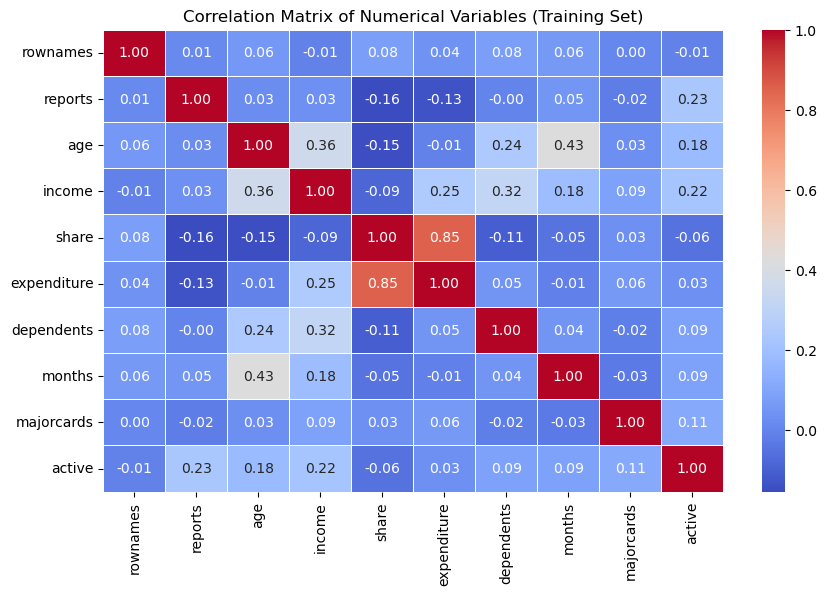

In [135]:
# Select only numeric columns from the training set
numeric_train_df = train_df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical variables
correlation_matrix = numeric_train_df.corr()

# Print the correlation matrix in a readable format
print("Correlation Matrix:\n", correlation_matrix)

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables (Training Set)")
plt.show()

### 2. Assessing Multicollinearity

Multicollinearity occurs when 2 or more independent variables are highly correlated, which can distort regression coefficients and lead to unreliable predictions. To detect potential multicollinearity, we look for correlation values above 0.7 or below -0.7 between independent variables.

**Share vs Expenditure = 0.85**:
This is very high multicollinearity and suggests that one of these variables should be removed from the regression model. Share is the ratio of monthly credit card expenditure to yearly income, so it is directly influenced by the variable Expenditure.

**No other critical issues**:
No other correlation is above 0.7, so multicollinearity is not a major issue for other variables.

### 3. Decision on Removing Variables to reduce Multicollinearity
The only concering case of multicollinearity is between share and expenditre (0.85 correlation). Including both in the model would introduce redundancy and instability, so we decide to remove share as an input variable and keep expenditure.

### 4. Why Remove Share and Not Expenditure?
1. Share is a derived variable, meaning it does not provide additional independent information beyond what expenditure and income already do.
2. As share = expenditure/income, it is directly dependent on expenditure, making them redundant.
3. Expenditure represents actual credit card spending, which is a direct numerical value rather than a ratio.
4. Expenditure is more interpretable in a regression model since it directly contributes to income patterns without being dependent on another variable.

### 5. Building a Multiple Linear Regression Model:

In [147]:
# Define independent (X) and dependent (y) variables (excluding 'share')
X_train = train_df[['reports', 'age', 'expenditure', 'dependents', 'months', 'majorcards', 'active']]
y_train = train_df['income']

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Function for Backward Elimination
def backward_elimination(X, y, significance_level=0.05):
    while True:
        # Fit the regression model
        model = sm.OLS(y, X).fit()
        
        # Get the predictor with the highest p-value
        max_p_value = model.pvalues.max()
        
        # If the highest p-value is above the significance level, remove the corresponding variable
        if max_p_value > significance_level:
            worst_feature = model.pvalues.idxmax()
            print(f"Removing: {worst_feature} (p-value: {max_p_value:.4f})")  # Print removed variables
            X = X.drop(columns=[worst_feature])
        else:
            break  # Stop when all p-values are below the significance threshold

    return model

# Run backward elimination
final_model = backward_elimination(X_train, y_train)

# Display final model summary
print(final_model.summary())

Removing: reports (p-value: 0.4097)
Removing: months (p-value: 0.0986)
Removing: majorcards (p-value: 0.0862)
                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     70.71
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           3.61e-51
Time:                        13:02:17   Log-Likelihood:                -1403.1
No. Observations:                 791   AIC:                             2816.
Df Residuals:                     786   BIC:                             2840.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------

### Summary of Model:
1. **Significant Predictors:**
After performing backward elimination, the final model includes the following significant predictors for income:
- Age
- Expenditure
- Dependents
- Active Accounts

All the variables have a p-value < 0.0001. The removed variables (reprots, months, majorcards) had high p-values, meaning they did not significantly contribute to predicting income.

2. **Regression Equation:**
Income = 0.9153 + (0.0491 x age) + (0.0015 x expenditure) + (0.3059 x dependents) + (0.0362 x active)
- Age: Each additional year of age is associated with a USD 491 increase in yearly income.
- Expenditure: Each additional dollar spent on credit cards increases yearly income by USD 15.
- Dependents: Each additional dependent increases income by USD 3059 pr year.
- Active Accounts: Each additional active credit accounts increases income by USD 362 per year.

## <u>Model Metrics<u>

### 1. Total Sum of Squares (SST)

In [164]:
# Calculate the Total Sum of Squares (SST)
y_mean = y_train.mean()  # Mean of the outcome variable (income)
sst = ((y_train - y_mean) ** 2).sum()  # Sum of squared differences from the mean

print(f"Total Sum of Squares (SST): {sst:.4f}")

Total Sum of Squares (SST): 2187.3366


- SST = 2187.3366 represents the total variability in income before accounting for any predictors.
- SST measures how spread out income values are around the mean.
- Higher SST indicates more variation in income, while a lower SST would suggest incomes are closer to their mean value. This acts as a baseline to compare against the variability explained by our model. and the unexplained variability.

### 2. Total Sum of Squares due to Regression (SSR)

In [162]:
# Compute the mean of the outcome variable (income)
y_mean = y_train.mean()

# Compute the fitted values (predicted income values)
y_pred = final_model.fittedvalues

# Compute SSR (Regression Sum of Squares)
ssr = ((y_pred - y_mean) ** 2).sum()

print(f"Regression Sum of Squares (SSR): {ssr:.4f}")

Regression Sum of Squares (SSR): 578.8453


- SSR = 578.8453 measures how much of the total variation in income is explained by our model.
- SSR measures how well our independent variables predict income.

### 3. SSR/SST and What It Measures

In [168]:
r_squared_manual = ssr / sst
print(f"SSR / SST (R-squared): {r_squared_manual:.4f}")

SSR / SST (R-squared): 0.2646


- SSR/SST stands for the R squared value in our model summary
- It represents the proportion of the total variation in income that is explained by the model
- 26.46% of the variation in income is explained by the predictors (*age, expenditure, dependents and active*)
- 73.54% of the variation remains unexplained, meaning other important predictos are missing.

### 4. Choosing a Predictor and Converting t-value to p-value

In [171]:
# Extract the t-values from the regression model
t_values = final_model.tvalues

# Display the t-values for each predictor
print(t_values)

const          4.905147
age            8.960106
expenditure    7.688941
dependents     7.142511
active         4.512525
dtype: float64


To calculate the p-value from a t-value, we use the t-distribution cumulative density function (CDF):
p = 2 x (1-CDF(|t|)

I am selecting **Age** as the predictor for this excercise, as Age has the highest t-value. 

In [178]:
# Degrees of freedom (df) = Number of observations - Number of predictors - 1
df = len(y_train) - X_train.shape[1]

# t-value for Age
t_value_age = 8.9601

# Compute the two-tailed p-value
p_value_age = 2 * (1 - t.cdf(abs(t_value_age), df))

print(f"p-value for Age: {p_value_age:.10f}")

p-value for Age: 0.0000000000


The p-value is essentially 0, meaning that Age is a highly statistically significant predictor of income in our model.

### 5. F-Statistic and What it Measures

In [188]:
# Extract the F-statistic from the final regression model summary
f_statistic = final_model.fvalue

print(f"F-Statistic: {f_statistic:.4f}")

F-Statistic: 70.7142


- F-statistic for my model is 70.7142, which is very high.
- F-statistic tests whether at least one of the independent variavles in the model significantly explains variability in the dependent variable (income)
- Since the f-statistic is high, and the p-value very sall (p<0.00001), we reject the null hypothesis that all coefficients are zero.
- This means that at least on our predictors (age, expenditure, dependents, active) has a significant effect on income.
- This proves that my model is statistically significant.

### 6. Predicting Income of a Fictional Consumer Using the Model:

In [194]:
# Define the fictional consumer's attributes
fictional_consumer = {
    'age': 35,          # 35 years old
    'expenditure': 500, # Monthly credit card expenditure of $500
    'dependents': 2,    # 2 dependents
    'active': 5         # 5 active credit accounts
}

# Extract the coefficients from the final model
coefficients = final_model.params

# Compute the predicted income using the regression equation
predicted_income = (coefficients['const'] +
                    coefficients['age'] * fictional_consumer['age'] +
                    coefficients['expenditure'] * fictional_consumer['expenditure'] +
                    coefficients['dependents'] * fictional_consumer['dependents'] +
                    coefficients['active'] * fictional_consumer['active'])

# Convert income from $10,000 units to actual dollars
predicted_income_dollars = predicted_income * 10_000

print(f"Predicted Income for Fictional Consumer: ${predicted_income_dollars:,.2f}")

Predicted Income for Fictional Consumer: $41,733.42


**Prediction** 

Based on our multiple linear regression model, a 35 year old individual with USD 500 in monthly credit card expenditures, 2 dependents, and 5 active credit accounts is expected to earn USD 41,733 per year

**Comparing to the Mean Income in the Dataset**

The mean income in the dataset is USD 33,653.76 (3.365 × 10,000).
This prediction (USD 41,733.42) is above the average but within a reasonable range.
This makes sense because the fictional consumer has multiple credit accounts and moderate expenditures, which the model sees as signs of higher income.

**Breaking Down the Influence of Each Factor**

**Age (35 years)** → Older individuals tend to earn more due to experience.
**Expenditure (USD 500/month)** → Higher credit card spending is associated with higher income.
**Dependents (2)** → More dependents are positively correlated with income (suggesting financial stability).
**Active Accounts (5)** → More credit activity indicates financial engagement, linked to income level.

### 7. Assessing Accuracy of Model against Training Data and Validation Data

In [208]:
# Use the correct predictor variables from the final model
predictor_variables = ['age', 'expenditure', 'dependents', 'active']

X_train = train_df[predictor_variables]
y_train = train_df['income']

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Fit the final regression model
final_model = sm.OLS(y_train, X_train).fit()
# Prepare validation set (test_df) using the same predictor variables
X_test = test_df[predictor_variables]
y_test = test_df['income']

# Add constant to test set for intercept
X_test = sm.add_constant(X_test)

# Make predictions on training and validation sets
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Compute Mean Squared Error (MSE) for training and validation sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Compute Root Mean Squared Error (RMSE) for better interpretability
rmse_train = mse_train ** 0.5
rmse_test = mse_test ** 0.5

# Display the results
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Validation RMSE: {rmse_test:.4f}")

Training RMSE: 1.4260
Validation RMSE: 1.5384


#### Answer 1: Interpretation:
1. **Slightly Higher Validation RMSE:**
The validation RMSE (1.5384) is slightly higher than the training RMSE (1.4260), but not drastically different.
This suggests that the model is not overfitting, as it generalizes reasonably well to new data.
2. **Absolute RMSE Value:**
Since income is measured in USD 10,000 units, an RMSE of 1.4260 in training means that our model’s predictions for income are off by approximately USD 14,260 on average. In the validation set, the error increases to about USD 15,384, which is still within a reasonable range. However, this is not a highly precise model—it suggests that other key factors influencing income are missing.
3. **Model Generalization:**
The small gap between training and validation RMSE suggests that the model is not suffering from severe overfitting. However, an RMSE around USD 15,000 means the model still has significant prediction error.

#### Answer 2:
Finding Training RMSE and Validation RSME for SLR model

In [216]:
# Define independent (X) and dependent (y) variables for SLR (only 'dependents')
X_train_slr = train_df[['dependents']]
y_train_slr = train_df['income']

# Add constant for intercept
X_train_slr = sm.add_constant(X_train_slr)

# Fit the simple linear regression model
slr_model = sm.OLS(y_train_slr, X_train_slr).fit()

print(slr_model.summary())
# Prepare validation set for SLR
X_test_slr = test_df[['dependents']]
y_test_slr = test_df['income']

# Add constant for intercept
X_test_slr = sm.add_constant(X_test_slr)

# Make predictions on training and validation sets
y_train_pred_slr = slr_model.predict(X_train_slr)
y_test_pred_slr = slr_model.predict(X_test_slr)

# Compute Mean Squared Error (MSE)
mse_train_slr = mean_squared_error(y_train_slr, y_train_pred_slr)
mse_test_slr = mean_squared_error(y_test_slr, y_test_pred_slr)

# Compute Root Mean Squared Error (RMSE)
rmse_train_slr = mse_train_slr ** 0.5
rmse_test_slr = mse_test_slr ** 0.5

print(f"SLR Training RMSE: {rmse_train_slr:.4f}")
print(f"SLR Validation RMSE: {rmse_test_slr:.4f}")

# Extract R-squared from the SLR model
r_squared_slr = slr_model.rsquared

print(f"SLR R-squared: {r_squared_slr:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     88.58
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           5.21e-20
Time:                        14:38:46   Log-Likelihood:                -1482.6
No. Observations:                 791   AIC:                             2969.
Df Residuals:                     789   BIC:                             2979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9601      0.072     41.158      0.0

#### Overfitting Risk
Overfitting occurs when a model performs well on training data but poorly on validation data, meaning it has learned patterns that do not generalize.

Our Model Shows Low Overfitting Risk

Training RMSE: 1.4260
Validation RMSE: 1.5384
The small gap between training and validation RMSE indicates that the model generalizes reasonably well and is not overfitting.

However, the Model is Still Not Highly Accurate:

The RMSE values suggest that income predictions deviate by ~USD 14,000 to ~USD 15,000 on average.
This means some key predictors of income are missing from our dataset (e.g., job type, education level, or industry).

#### Accuracy: MLR is better than SLR
1. **MLR has a lower RMSE than SLR**

- SLR Training RMSE: 1.5768 → MLR Training RMSE: 1.4260 (Better)
- SLR Validation RMSE: 1.6482 → MLR Validation RMSE: 1.5384 (Better)
  
This means MLR predicts income more accurately than SLR, reducing the average prediction error.

2. **MLR explains more variance in income**

- SLR R-sqrd = 0.1009 (10.1%) → MLR R_sqrd = 0.265 (26.5%)
- MLR explains 26.5% of income variation, while SLR explains only 10.1%.
  
This confirms that dependents alone is a weak predictor of income, and adding Age, Expenditure, and Active Accounts significantly improves prediction accuracy.

#### Answer 3: Limitations of Predicting Income Using The Available Variables

While our Multiple Linear Regression (MLR) model improves upon the Simple Linear Regression (SLR) model, it still has significant limitations. The most critical limitation is:

**Missing Key Predictors of Income:**
- Our model only explains 26.5% of the variation in income (R_sqrd = 0.265), meaning 73.5% of the variation remains unexplained.
- This suggests that many important factors that influence income are missing from our dataset.

**Key Missing Factors That Likely Affect Income:**

1. **Education Level** – Higher education is strongly linked to higher-paying jobs.
2. **Employment Status** – Full-time, part-time, or unemployed status significantly impacts income.
3. **Industry or Job Type** – A software engineer and a cashier will have vastly different salaries.
4. **Work Experience & Career Level** – More years in the workforce generally lead to higher earnings.
5. **Geographical Location** – Income varies significantly across cities, states, and countries due to differences in the cost of living and local job markets.
